In [60]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model
from keras.preprocessing import image
from keras import optimizers
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [61]:
img_width = 150
img_height = 150

train_data_dir = 'Cat_Dog_Image/Training'
validation_data_dir = 'Cat_Dog_Image/Validation'
train_samples = 120
validation_samples = 30
epochs = 20
batch_size = 20


In [38]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.001),
              metrics=['accuracy'])

In [46]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
#test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [47]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2300 images belonging to 2 classes.


In [48]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1200 images belonging to 2 classes.


In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
6/6 [==============================] - 6s 1s/step - loss: 0.6769 - accuracy: 0.6333 - val_loss: 0.6360 - val_accuracy: 0.6400
Epoch 2/20
6/6 [==============================] - 6s 1s/step - loss: 0.6225 - accuracy: 0.6667 - val_loss: 0.6591 - val_accuracy: 0.6130
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 0.6839 - accuracy: 0.5917 - val_loss: 0.6496 - val_accuracy: 0.6020
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 0.6784 - accuracy: 0.5083 - val_loss: 0.6478 - val_accuracy: 0.6110
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.6579 - accuracy: 0.5167 - val_loss: 0.6555 - val_accuracy: 0.5830
Epoch 6/20
6/6 [==============================] - 6s 1s/step - loss: 0.6259 - accuracy: 0.6500 - val_loss: 0.6595 - val_accuracy: 0.5980
Epoch 7/20
6/6 [==============================] - 6s 1s/step - loss: 0.6023 - accuracy: 0.6667 - val_loss: 0.6491 - val_accuracy: 0.6100
Epoch 8/20
6/6 [=========================

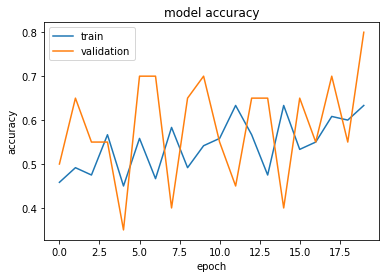

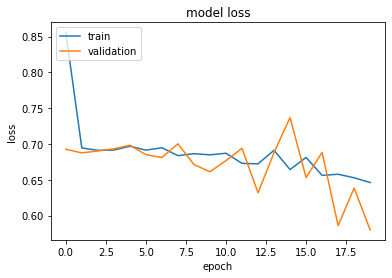

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
#Replacing convolution layers with VGG16

In [139]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=False)

In [140]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [138]:
train_data_dir = 'Cat_Dog_Image/Training'
validation_data_dir = 'Cat_Dog_Image/Validation'
#test_dir='Cat_Dog_Image/Testing'
datagen = ImageDataGenerator(rescale=1./255)
test_dataGen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [105]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4 ,4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = vggmodel.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >=sample_count:
            break
    return features, labels

In [106]:
train_features, train_labels = extract_features(train_data_dir, 2300)
validation_features, validation_labels = extract_features(validation_data_dir, 1200)
#test_features, test_labels = extract_features(test_dir, 500)

Found 2300 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [107]:
train_features = np.reshape(train_features,(2300, 4* 4* 512))
validation_features = np.reshape(validation_features,(1200, 4* 4* 512))
#test_features = np.reshape(test_features,(500, 4* 4* 512))

In [108]:
model = Sequential()
model.add(Dense(64, input_dim=(4* 4* 512)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [109]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [110]:
history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Epoch 1/30
115/115 [==============================] - 2s 8ms/step - loss: 0.6893 - accuracy: 0.5894 - val_loss: 0.5249 - val_accuracy: 0.7833
Epoch 2/30
115/115 [==============================] - 1s 8ms/step - loss: 0.5114 - accuracy: 0.7504 - val_loss: 0.4333 - val_accuracy: 0.8258
Epoch 3/30
115/115 [==============================] - 1s 8ms/step - loss: 0.4425 - accuracy: 0.8048 - val_loss: 0.3814 - val_accuracy: 0.8458
Epoch 4/30
115/115 [==============================] - 1s 7ms/step - loss: 0.3833 - accuracy: 0.8315 - val_loss: 0.3542 - val_accuracy: 0.8492
Epoch 5/30
115/115 [==============================] - 1s 7ms/step - loss: 0.3466 - accuracy: 0.8548 - val_loss: 0.3322 - val_accuracy: 0.8625
Epoch 6/30
115/115 [==============================] - 1s 7ms/step - loss: 0.3269 - accuracy: 0.8670 - val_loss: 0.3177 - val_accuracy: 0.8700
Epoch 7/30
115/115 [==============================] - 1s 7ms/step - loss: 0.2820 - accuracy: 0.8886 - val_loss: 0.3064 - val_accuracy: 0.8717
Epoch 

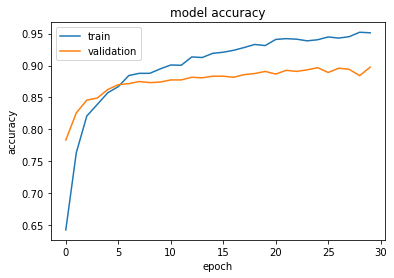

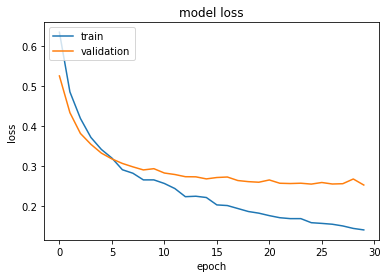

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [112]:
#Fine Tuning

In [113]:
vggmodel.trainable = True
set_trainable = False
for layer in vggmodel.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [114]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [125]:
model = Sequential()
model.add(Dense(256, input_dim=(4* 4* 512)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [126]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [127]:
history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Epoch 1/30
115/115 [==============================] - 3s 24ms/step - loss: 0.6439 - accuracy: 0.6352 - val_loss: 0.4262 - val_accuracy: 0.8258
Epoch 2/30
115/115 [==============================] - 3s 22ms/step - loss: 0.4027 - accuracy: 0.8355 - val_loss: 0.3466 - val_accuracy: 0.8708
Epoch 3/30
115/115 [==============================] - 3s 22ms/step - loss: 0.3468 - accuracy: 0.8534 - val_loss: 0.3177 - val_accuracy: 0.8733
Epoch 4/30
115/115 [==============================] - 2s 21ms/step - loss: 0.3016 - accuracy: 0.8706 - val_loss: 0.2958 - val_accuracy: 0.8783
Epoch 5/30
115/115 [==============================] - 3s 22ms/step - loss: 0.2767 - accuracy: 0.8858 - val_loss: 0.2895 - val_accuracy: 0.8858
Epoch 6/30
115/115 [==============================] - 3s 22ms/step - loss: 0.2446 - accuracy: 0.9103 - val_loss: 0.3136 - val_accuracy: 0.8633
Epoch 7/30
115/115 [==============================] - 3s 22ms/step - loss: 0.2413 - accuracy: 0.9083 - val_loss: 0.2699 - val_accuracy: 0.8833

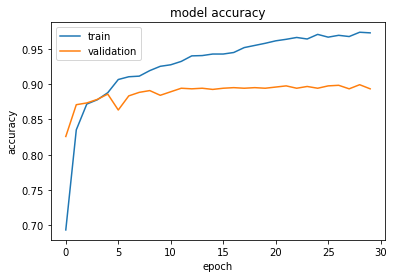

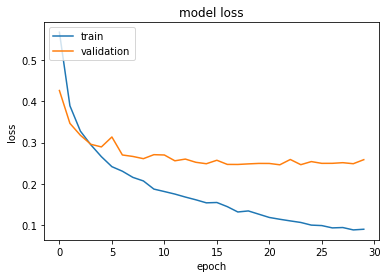

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [129]:
score = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25357523560523987
Test accuracy: 0.8960000276565552
